## **Correlation between news and stock movement**


#### **Load and Merge News & Stock Data on Date**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the datasets
news_df  = pd.read_csv('../data/sentiment.csv', parse_dates=["Date"])
stock_df = pd.read_csv('../data/stock_data.csv', parse_dates=["Date"])

# Aggregate Daily Sentiment Scores
# Since we have multiple news articles exist for a single day, average the sentiment scores:
daily_sentiment = df_news.groupby("Date")[["compound"]].mean().reset_index()

# Convert to proper datetime format
daily_sentiment["Date"] = daily_sentiment["Date"].dt.date
stock_df["Date"] = stock_df["Date"].dt.date

# Merge data based on matching dates
merged_df = pd.merge(stock_df, daily_sentiment, on="Date", how="inner")
print(merged_df.head())

         Date     Open     High      Low    Close       Volume stock  \
0  2020-06-11  84.9994  85.4272  81.6339  81.7375  207185212.0  AAPL   
1  2020-06-10  84.6554  86.3270  84.2159  85.8578  171215704.0  AAPL   
2  2020-06-09  80.8219  84.1006  80.7894  83.7045  151757636.0  AAPL   
3  2020-06-08  80.3627  81.1765  79.6472  81.1433   98274145.0  AAPL   
4  2020-06-05  78.6834  80.7263  78.6540  80.6663  141008958.0  AAPL   

      SMA_20     EMA_20     RSI_14      MACD  MACD_Signal  MACD_Hist  \
0  87.505575  87.495180  27.116381 -3.598850    -3.553687  -0.045163   
1  87.141820  87.339239  41.642034 -3.300203    -3.502990   0.202787   
2  86.687055  86.993074  37.442240 -3.200385    -3.442469   0.242084   
3  86.209735  86.435952  33.158575 -3.290020    -3.411979   0.121959   
4  85.694515  85.886462  32.414775 -3.360806    -3.401745   0.040939   

   Daily_Return  Cumulative_Return  compound  
0     -0.008549           0.326760  0.123685  
1      0.050409           0.343232  0.04

we are now ensures stock prices align with corresponding news headlines

In [18]:
# check the shape of the merged data
merged_df.shape

(9574, 16)

In [19]:
# check missing values
merged_df.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
stock                0
SMA_20               0
EMA_20               0
RSI_14               0
MACD                 0
MACD_Signal          0
MACD_Hist            0
Daily_Return         0
Cumulative_Return    0
compound             0
dtype: int64

In [20]:
# check the data types
merged_df.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
stock                 object
SMA_20               float64
EMA_20               float64
RSI_14               float64
MACD                 float64
MACD_Signal          float64
MACD_Hist            float64
Daily_Return         float64
Cumulative_Return    float64
compound             float64
dtype: object

In [21]:
# consise summary of merged dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9574 entries, 0 to 9573
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               9574 non-null   object 
 1   Open               9574 non-null   float64
 2   High               9574 non-null   float64
 3   Low                9574 non-null   float64
 4   Close              9574 non-null   float64
 5   Volume             9574 non-null   float64
 6   stock              9574 non-null   object 
 7   SMA_20             9574 non-null   float64
 8   EMA_20             9574 non-null   float64
 9   RSI_14             9574 non-null   float64
 10  MACD               9574 non-null   float64
 11  MACD_Signal        9574 non-null   float64
 12  MACD_Hist          9574 non-null   float64
 13  Daily_Return       9574 non-null   float64
 14  Cumulative_Return  9574 non-null   float64
 15  compound           9574 non-null   float64
dtypes: float64(14), object(2

#### **Visualize the Price Movement of Each Stock with News Sentiment**

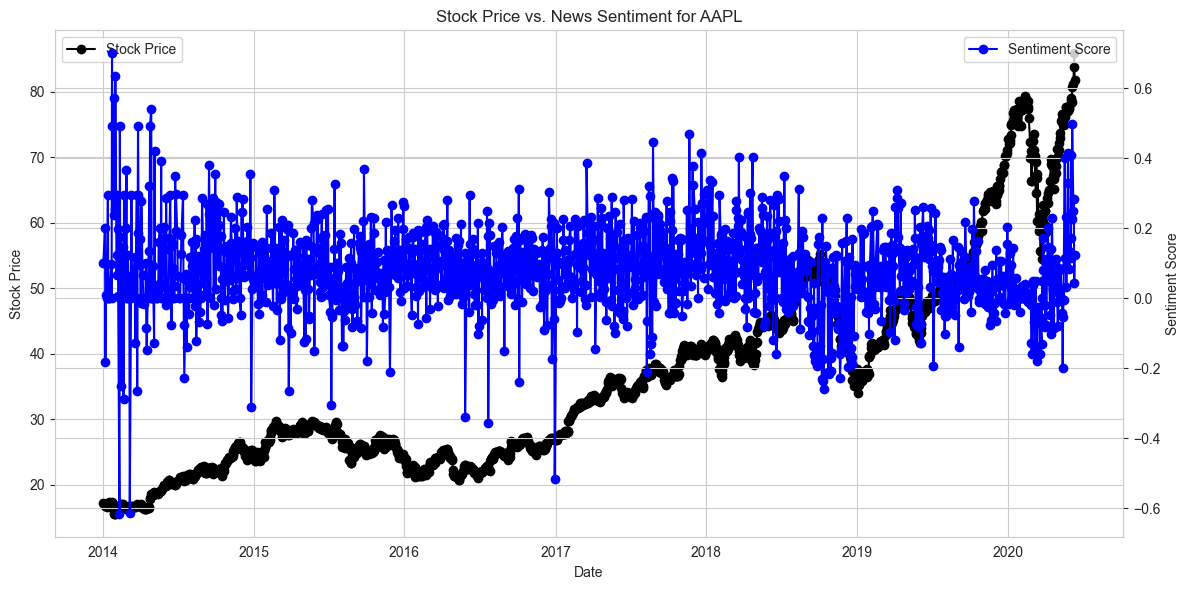

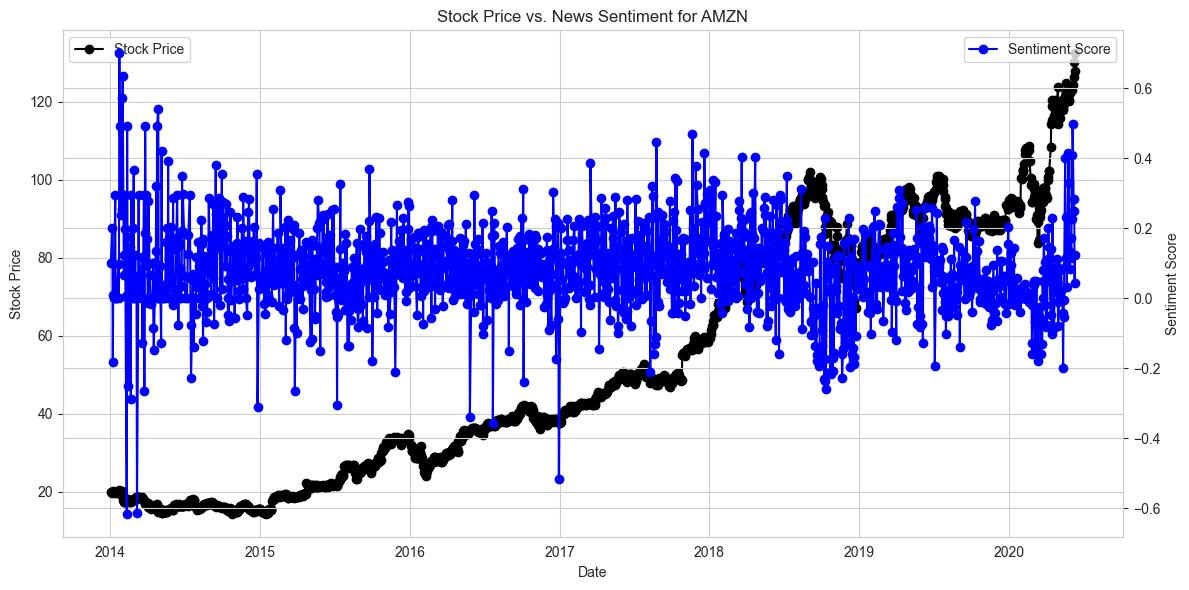

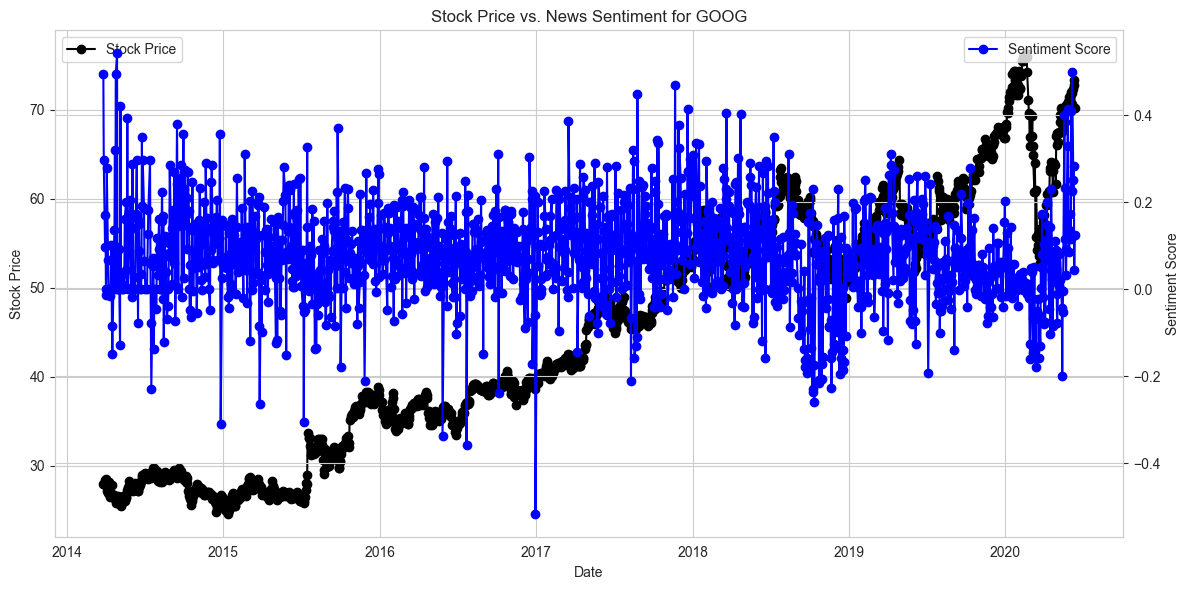

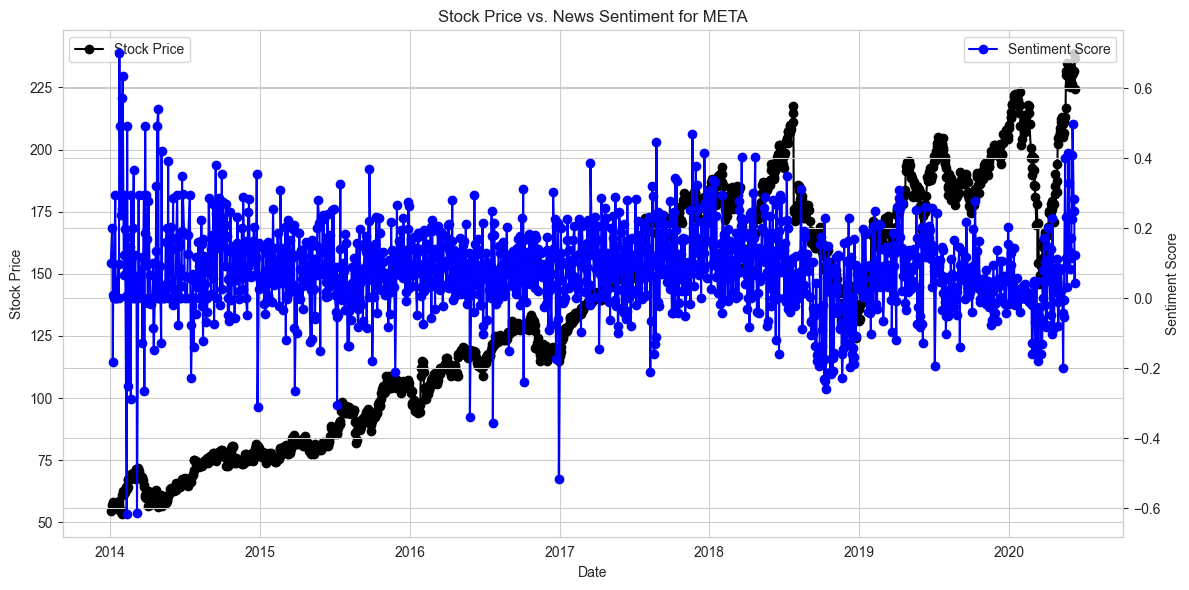

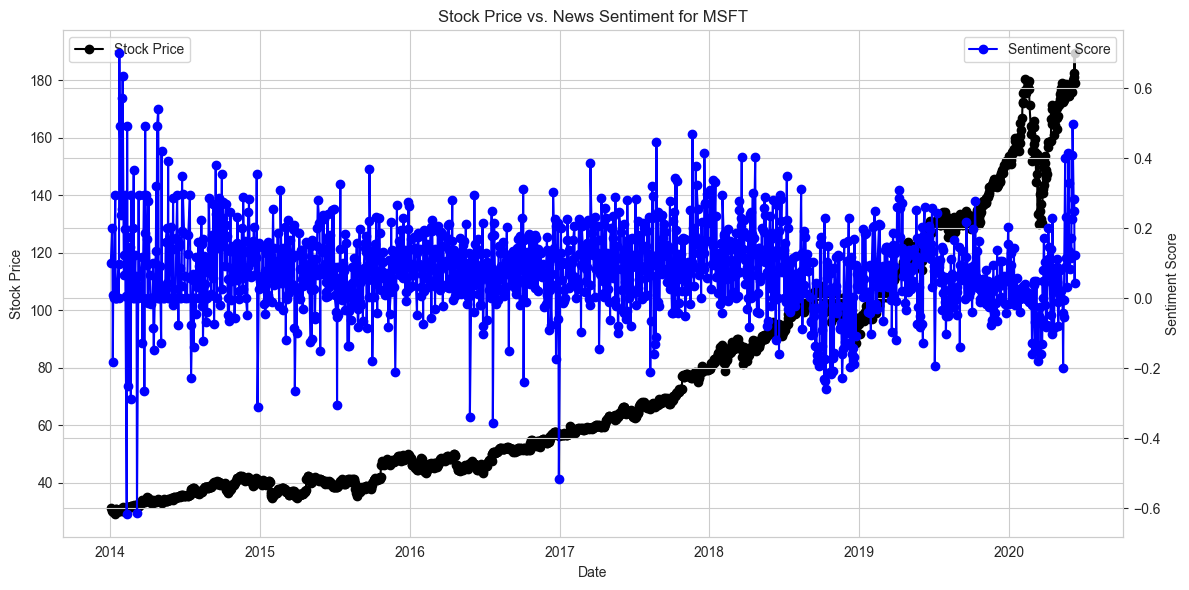

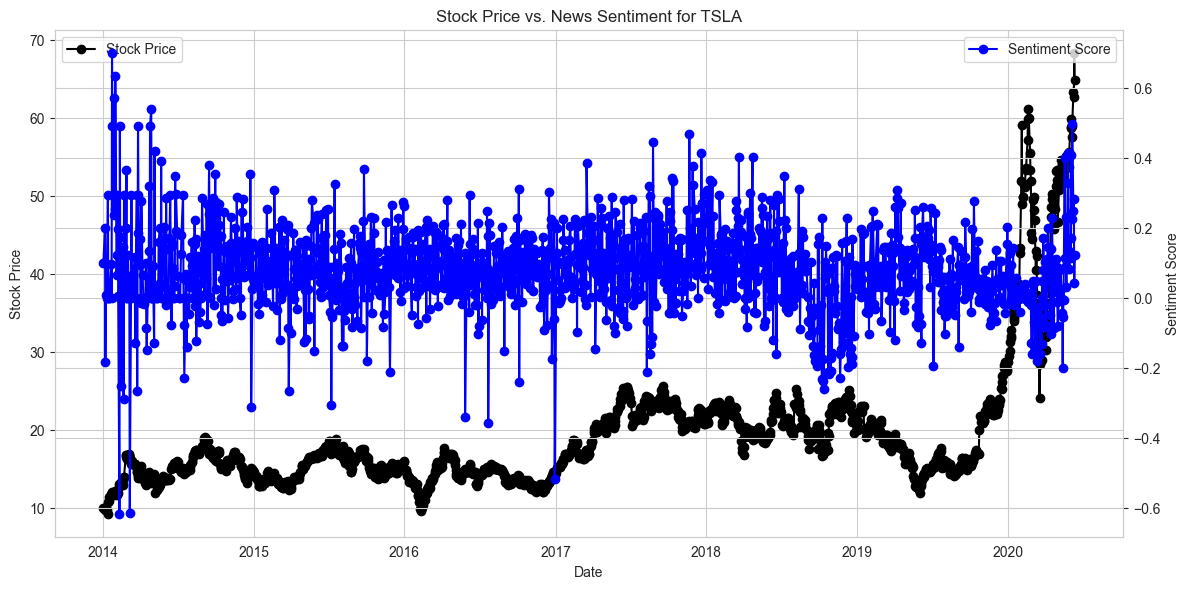

In [ ]:
stocks = merged_df['stock'].unique()

for stock in stocks:
    stock_data = merged_df[merged_df['stock'] == stock]  

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot stock price movement
    ax1.plot(stock_data['Date'], stock_data['Close'], label="Stock Price", color="black", linestyle="-", marker="o")
    ax1.set_ylabel("Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_title(f"Stock Price vs. News Sentiment for {stock}")
    ax1.legend(loc="upper left")
    ax1.grid(True)

    # Create secondary y-axis for sentiment trends
    ax2 = ax1.twinx()
    ax2.plot(stock_data['Date'], stock_data['compound'], label="Sentiment Score", color="blue", linestyle="-", marker="o")
    ax2.set_ylabel("Sentiment Score")
    ax2.legend(loc="upper right")

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Now, we can compare stock trends with sentiment shifts over time for different stocks


#### **Compute Correlation Between Sentiment & Stock Movements**

In [29]:
correlation = merged_df[["compound", "Daily_Return"]].corr(method="pearson")
print("Pearson correlation:", correlation)

Pearson correlation:               compound  Daily_Return
compound      1.000000     -0.010337
Daily_Return -0.010337      1.000000


### **Scatter Plot for Correlation Analysis***

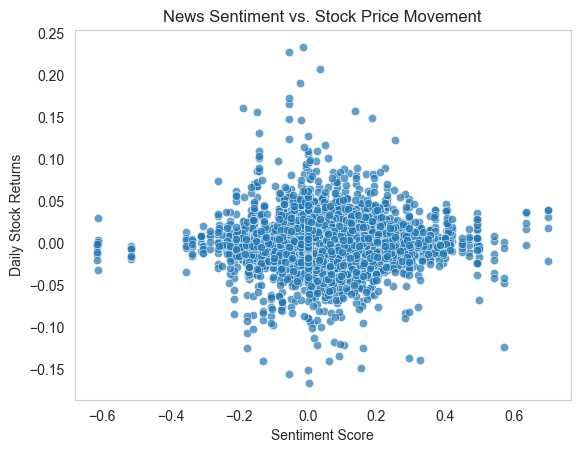

In [ ]:
sns.scatterplot(x=merged_df["compound"], y=merged_df["Daily_Return"], alpha=0.7)
plt.title("News Sentiment vs. Stock Price Movement")
plt.xlabel("Sentiment Score")
plt.ylabel("Daily Stock Returns")
plt.grid()
plt.show()